## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [10]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Fri Aug 02 13:18:19 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.91       Driver Version: 418.91       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1060   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   54C    P2    31W /  N/A |   5123MiB /  6144MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [11]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [12]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
import numpy as np
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    (x-np.mean(x))/np.std(x)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes) 
    return y

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32,16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [16]:
from keras.callbacks import ReduceLROnPlateau

LR_function=ReduceLROnPlateau(monitor='val_acc',
                             patience=3,
                             verbose=1,
                             factor=0.5,
                             min_lr=0.00001)

## 超參數設定
LEARNING_RATE = 0.00001
EPOCHS = 100
BATCH_SIZE = 256

In [17]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [18]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[LR_function])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 51us/step - loss: 7.8180 - acc: 0.1479 - val_loss: 3.9922 - val_acc: 0.1730
Epoch 2/100
50000/50000 [==============================] - 2s 37us/step - loss: 3.0562 - acc: 0.1599 - val_loss: 2.5176 - val_acc: 0.1422
Epoch 3/100
50000/50000 [==============================] - 2s 41us/step - loss: 2.3811 - acc: 0.1479 - val_loss: 2.3126 - val_acc: 0.1576
Epoch 4/100
50000/50000 [==============================] - 2s 37us/step - loss: 2.2768 - acc: 0.1682 - val_loss: 2.2687 - val_acc: 0.1862
Epoch 5/100
50000/50000 [==============================] - 2s 41us/step - loss: 2.2260 - acc: 0.1992 - val_loss: 2.2210 - val_acc: 0.2039
Epoch 6/100
50000/50000 [==============================] - 2s 38us/step - loss: 2.1913 - acc: 0.2179 - val_loss: 2.1914 - val_acc: 0.2211
Epoch 7/100
50000/50000 [==============================] - 2s 38us/step - loss: 2.1599 - acc: 0.2316 - val_loss: 2.1662 - 

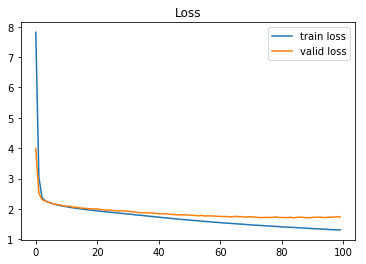

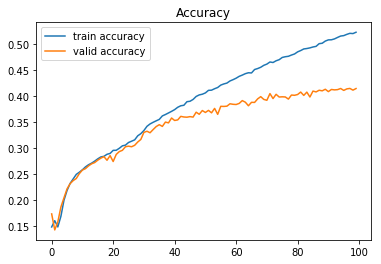

In [20]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()